In [48]:
import numpy as np
from matplotlib import pyplot as plt
# from numba import jit
from pathlib import Path
from tensorflow import keras

import tensorflow as tf

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

tf.test.is_gpu_available()

tf.config.list_physical_devices('GPU')

from skimage.transform import resize
from skimage import img_as_ubyte

In [9]:
data = np.load('./../Загрузки/Sirius_data/cubes_with_missed_data/inpainting_cube_missed_data.npy')
first_slice = data[0, :, :]

In [10]:
SLICE_HEIGHT = 350
SLICE_WIDTH = 300
STRIDE_X = 30
STRIDE_Y = 30

In [304]:
def save_slices_from_data(
    path_to_dataset, data
):
    path_to_dataset.mkdir(exist_ok=True)
    
    path_to_save_images = path_to_dataset / 'images'
    path_to_save_gt = path_to_dataset / 'gt'

    path_to_save_images.mkdir(exist_ok=True)
    path_to_save_gt.mkdir(exist_ok=True)
    
#    don't keep all the data in memory (~ 16 GB)
    k = 0
    for ind, first_slice in enumerate(data):
        # first_slice = data[-1, :, :].copy()
        for i in range(0, data.shape[1], STRIDE_X):
            for j in range(0, data.shape[2], STRIDE_Y):
                additional_slice = first_slice[i:i+SLICE_HEIGHT, j:j+SLICE_WIDTH].copy()
                # если есть вырез не берем 
                if (additional_slice == 0).sum() != 0:
                    continue
                # если не полный кусок, то тоже не берём
                if additional_slice.shape != (SLICE_HEIGHT, SLICE_WIDTH):
                    continue

                original_slice = additional_slice.copy()
                additional_slice[SLICE_HEIGHT//2-100:SLICE_HEIGHT//2+100, SLICE_WIDTH//2-50:SLICE_WIDTH//2+50] = 0
                
                np.save(path_to_save_images / f'{k}_{ind}.npy', additional_slice)
                np.save(path_to_save_gt / f'{k}_{ind}.npy', original_slice)
                k += 1

In [305]:
save_slices_from_data(
    data=data,
    path_to_dataset=Path('./dataset')
)

In [306]:
img_orig.shape

(350, 300)

0.19047619047619047


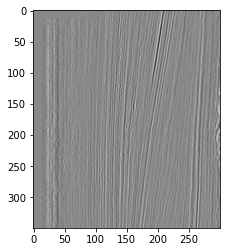

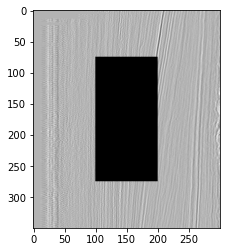

In [310]:
img_orig = np.load(Path('./dataset/gt/0_0.npy'))
img_blacked = np.load(Path('./dataset/images/0_0.npy'))

print((img_blacked == 0).sum() / (img_blacked != 1).sum())

plt.imshow(img_orig, cmap='gray')
plt.show()

plt.imshow(img_blacked, cmap='gray')
plt.show()